In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import random
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics.pairwise import cosine_similarity

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/COGS118A/Group025-Wi23/main/dataset.csv')
df.head()

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [3]:
df = df.drop(columns=['Unnamed: 0','track_id', 'album_name'], axis=1)

In [4]:
df.head()

,artists,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,Gen Hoshino,Comedy,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,Ben Woodward,Ghost - Acoustic,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,Ingrid Michaelson;ZAYN,To Begin Again,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,Kina Grannis,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,Chord Overstreet,Hold On,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [5]:
#Add one-hot encoding for categorical variables
bool_var = df.select_dtypes(include= ['boolean'])

encoder = preprocessing.LabelEncoder()
label = bool_var.apply(encoder.fit_transform)
df['explicit'] = label

In [6]:
onehot_encoder = preprocessing.OneHotEncoder()
genredf = pd.DataFrame(onehot_encoder.fit_transform(df[['track_genre']]).toarray(), columns = df['track_genre'].unique())
#artistdf = pd.DataFrame(onehot_encoder.fit_transform(df[['artists']]).toarray(), columns = df['artists'].unique())

In [7]:

df = df.join(genredf)
#df = df.join(artistdf)

In [8]:
df.head()

,artists,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,...,spanish,study,swedish,synth-pop,tango,techno,trance,trip-hop,turkish,world-music
0,Gen Hoshino,Comedy,73,230666,0,0.676,0.4610,1,-6.746,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Ben Woodward,Ghost - Acoustic,55,149610,0,0.420,0.1660,1,-17.235,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Ingrid Michaelson;ZAYN,To Begin Again,57,210826,0,0.438,0.3590,0,-9.734,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Kina Grannis,Can't Help Falling In Love,71,201933,0,0.266,0.0596,0,-18.515,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Chord Overstreet,Hold On,82,198853,0,0.618,0.4430,2,-9.681,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
# Now that data has been onehot encoded, can get rid of artists/track names from data
predf = df.drop(columns = ['artists', 'track_genre','track_name'], axis = 1)
predf.head()

,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,...,spanish,study,swedish,synth-pop,tango,techno,trance,trip-hop,turkish,world-music
0,73,230666,0,0.676,0.4610,1,-6.746,0,0.1430,0.0322,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,55,149610,0,0.420,0.1660,1,-17.235,1,0.0763,0.9240,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,57,210826,0,0.438,0.3590,0,-9.734,1,0.0557,0.2100,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,71,201933,0,0.266,0.0596,0,-18.515,1,0.0363,0.9050,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,82,198853,0,0.618,0.4430,2,-9.681,1,0.0526,0.4690,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
def euc_distance(user_metrics, source):
    """
    compute the euclidean distance for KNN
    """
    dist=0
    for i in source.columns:
        dist += (user_metrics[i] - source[i])**2
    return np.sqrt(dist)



In [11]:
#Copying 1 song here from predf due to large dataset size - can be replaced with mean album parameters later with spotipy
example_user = predf.iloc[90000]
k = 5
model = NearestNeighbors(n_neighbors=k, algorithm="auto", metric='euclidean')

In [12]:
model.fit(predf)
distances, indices = model.kneighbors([example_user])

C:\Users\Aniket Dhar\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(


In [13]:
#Set number of neighbors decided
#k = 3

#songlist = user_dist.sort_values(ascending = True)[1:k+1].index.tolist()
#songlist

recommendations = indices[0]
random.shuffle(recommendations)
recommendations = recommendations[:20]
recommended_songs = df.iloc[indices[0], :]
recommended_songs.head()

,artists,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,...,spanish,study,swedish,synth-pop,tango,techno,trance,trip-hop,turkish,world-music
92000,Elvis Presley,Can't Help Falling in Love,80,182360,0,0.396,0.293,2,-14.062,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
51512,Tegi Pannu;Manni Sandhu,Roll Deep,61,182378,0,0.753,0.687,6,-6.375,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
36960,Xad,Forever,53,182361,0,0.695,0.505,6,-9.036,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
90000,Elvis Presley,Can't Help Falling in Love,80,182360,0,0.396,0.293,2,-14.062,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
91200,Elvis Presley,Can't Help Falling in Love,80,182360,0,0.396,0.293,2,-14.062,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [14]:
#Some more data cleaning - need to remove duplicate songs
predf = predf.drop_duplicates()

#normalize the data so that size doesnt bias results
predf=(predf-predf.mean())/predf.std()


#Reselect example here so get updated val
example_user = predf.iloc[90000]
k = 5
model = NearestNeighbors(n_neighbors=k, algorithm="auto", metric='euclidean')
predf.head()

,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,...,spanish,study,swedish,synth-pop,tango,techno,trance,trip-hop,turkish,world-music
0,1.764181,0.006201,-0.304859,0.638580,-0.720543,-1.210308,0.307520,-1.316431,0.534475,-0.846131,...,-0.096482,-0.097073,-0.09327,-0.094688,-0.097122,-0.09663,-0.095738,-0.096136,-0.096581,-0.096925
1,0.920566,-0.740514,-0.304859,-0.835004,-1.889263,-1.210308,-1.765005,0.759623,-0.085262,1.833921,...,-0.096482,-0.097073,-0.09327,-0.094688,-0.097122,-0.09663,-0.095738,-0.096136,-0.096581,-0.096925
2,1.014301,-0.176572,-0.304859,-0.731392,-1.124643,-1.491544,-0.282880,0.759623,-0.276665,-0.311804,...,-0.096482,-0.097073,-0.09327,-0.094688,-0.097122,-0.09663,-0.095738,-0.096136,-0.096581,-0.096925
3,1.670446,-0.258497,-0.304859,-1.721457,-2.310794,-1.491544,-2.017921,0.759623,-0.456918,1.776822,...,-0.096482,-0.097073,-0.09327,-0.094688,-0.097122,-0.09663,-0.095738,-0.096136,-0.096581,-0.096925
4,2.185988,-0.286871,-0.304859,0.304721,-0.791855,-0.929073,-0.272407,0.759623,-0.305468,0.466547,...,-0.096482,-0.097073,-0.09327,-0.094688,-0.097122,-0.09663,-0.095738,-0.096136,-0.096581,-0.096925


In [15]:
model.fit(predf)
distances, indices = model.kneighbors([example_user])

C:\Users\Aniket Dhar\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(


In [16]:
recommendations = indices[0]
random.shuffle(recommendations)
recommended_songs = df.iloc[indices[0], :]
recommended_songs.head()

,artists,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,...,spanish,study,swedish,synth-pop,tango,techno,trance,trip-hop,turkish,world-music
90453,Bobby Vee,More Than I Can Say,49,149973,0,0.578,0.295,1,-10.379,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
90000,Elvis Presley,Can't Help Falling in Love,80,182360,0,0.396,0.293,2,-14.062,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
90187,Los Solitarios,No dudes de mi amor,40,171920,0,0.552,0.492,4,-8.919,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
90265,Manolo Muñoz,Angelito,37,132458,0,0.614,0.520,2,-5.900,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
90763,Josue,Mi Linda Esposa,29,163666,0,0.668,0.436,4,-8.540,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [17]:
#Calculate similarity to original
#sim = np.array(example_user)
example_user.head()

popularity      0.405023
duration_ms    -0.172758
explicit       -0.304859
danceability    0.143548
energy         -1.853607
Name: 96204, dtype: float64


### SVM IMPLEMENTATION 


An attempt to implement an SVM into the recommendation system, based on TA feedback.
Due to the fact that we don't have a means for binary classification in this dataset and we lack the means to get access to the data we would need to create it, instead I'm making a one versus rest classifier for the different features.

In [21]:
#import packages
import numpy as np
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import time
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
#reassigning for simplicity
df = pd.read_csv('https://raw.githubusercontent.com/COGS118A/Group025-Wi23/main/dataset.csv')
df = df.drop(columns=['Unnamed: 0','track_id', 'album_name'], axis=1)


#remove dupes
df=df.drop_duplicates()
#convert to numeric for multiclass
codes, unique = pd.factorize(df.track_genre)
df.track_genre = codes

traindf = df

#clean data for training
traindf =traindf.drop(columns = ['track_name', 'artists','track_genre'])
traindf=(traindf-traindf.mean())/traindf.std()
codes, unique = pd.factorize(df.explicit)
traindf.explicit= codes
traindf.head()

,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,1.764268,0.006293,0,0.638686,-0.720265,-1.210282,0.307535,-1.316467,0.534643,-0.846104,-0.518499,0.738159,0.947083,-1.150742,0.219839
1,0.920756,-0.740482,0,-0.834544,-1.888763,-1.210282,-1.763324,0.759602,-0.085173,1.833769,-0.518485,-0.593671,-0.779766,-1.499003,0.219839
2,1.014479,-0.176495,0,-0.730957,-1.124288,-1.491510,-0.282390,0.759602,-0.276601,-0.311812,-0.518502,-0.510755,-1.346388,-1.537643,0.219839
3,1.670544,-0.258426,0,-1.720784,-2.310215,-1.491510,-2.016036,0.759602,-0.456877,1.776674,-0.518278,-0.433022,-1.257733,1.982637,-2.076431
4,2.186024,-0.286803,0,0.304907,-0.791563,-0.929055,-0.271926,0.759602,-0.305408,0.466487,-0.518502,-0.687469,-1.165223,-0.080979,0.219839


In [20]:
#Train the Logistic model
tic = time.time()
X_train,X_test,y_train,y_test = train_test_split(traindf,df.track_genre,test_size = 0.33)
clf = OneVsRestClassifier(LogisticRegression()).fit(X_train, y_train)
toc = time.time()
print(toc-tic)


7.244168519973755


0.20470901569671898


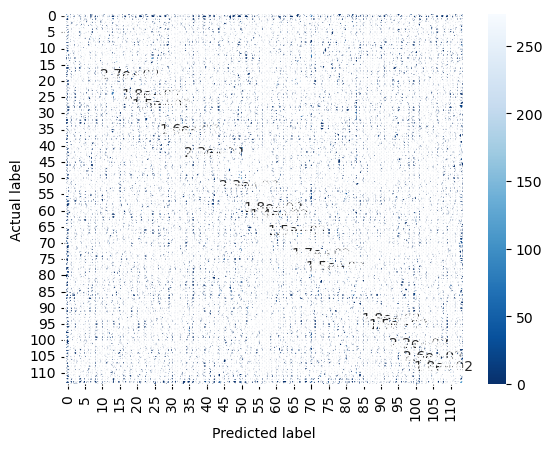

In [23]:
#Test
y_pred = clf.predict(X_test)
cm = metrics.confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap = 'Blues_r');
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
score =  metrics.accuracy_score(y_test, y_pred)
print(score)

In [24]:
#Train the SVM model
tic = time.time()
X_train,X_test,y_train,y_test = train_test_split(traindf,df.track_genre,test_size = 0.33)
clf = OneVsRestClassifier(SVC()).fit(X_train, y_train)
toc = time.time()
print(toc-tic)

2021.0850849151611


0.2326741089136964


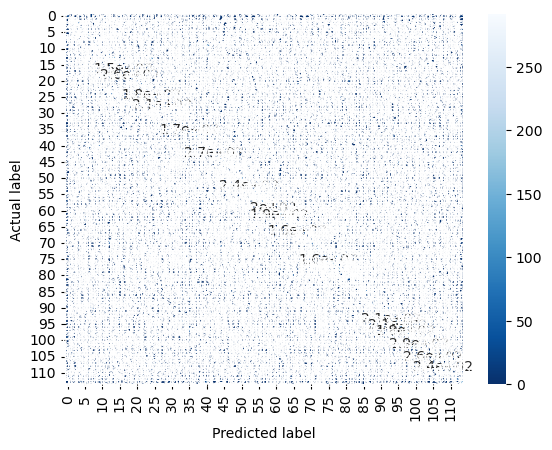

In [25]:
#Test
y_pred = clf.predict(X_test)
cm = metrics.confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap = 'Blues_r');
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
score =  metrics.accuracy_score(y_test, y_pred)
print(score)